In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets\\ad_spend.csv")
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [4]:
df.shape

(200, 3)

In [5]:
df.groupby("Season")[["Ad Spend ($)", "Revenue ($)"]].mean()

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


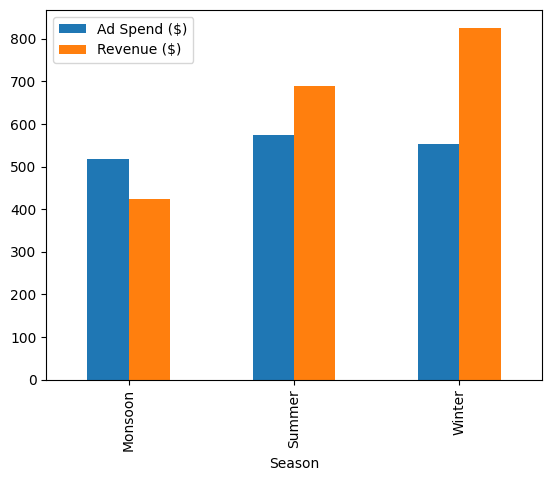

In [8]:
df.groupby("Season")[["Ad Spend ($)", "Revenue ($)"]].mean().plot(kind="bar")
plt.show()

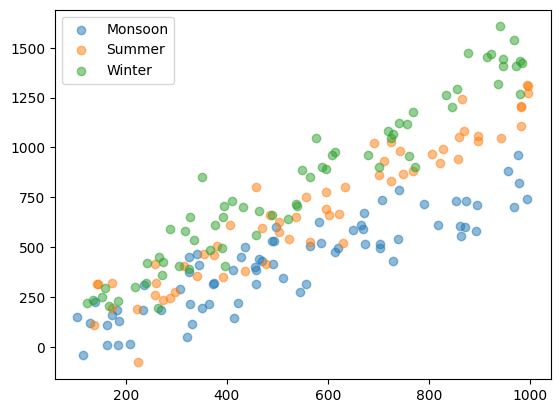

In [13]:
for season,  subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], alpha=0.5, label=season)
plt.legend()
plt.show()

In [14]:
df_encoded = pd.get_dummies(df, columns=["Season"], drop_first=True)
df_encoded.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True


In [15]:
from sklearn.model_selection import train_test_split
X = df_encoded[["Season_Summer", "Season_Winter", "Ad Spend ($)"]]
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)